<h1>Evaluation<h1/>

In [27]:
from joblib import load
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

from data.new_or_used import build_dataset
from src.preprocessing import preprocess_testing

<h2> 1. Loading Dataset<h2/>

In [2]:
_, _, X_test, y_test = build_dataset()

In [3]:
df = pd.DataFrame.from_records(X_test)

<h2> 2. Preprocessing<h2/>

In [4]:
preprocessed_df = preprocess_testing(df)
preprocessed_df

,accepts_mercadopago,automatic_relist,available_quantity,buy_mode._auction,buy_mode._buy_it_now,buy_mode._classified,cat._MLA1227,cat._MLA1383,cat._MLA15171,cat._MLA15328,...,shim._custom,shim._me1,shim._me2,shim._not_specified,sold_quantity,tag.dragged_bids_and_visits,tag.dragged_visits,tag.free_relist,tag.good_quality_thumbnail,tag.poor_quality_thumbnail
0,1.0,0.0,0.0000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.000115,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0
9996,1.0,0.0,0.0004,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0
9997,1.0,0.0,0.0000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9998,1.0,0.0,0.0000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0


In [5]:
del df, X_test

In [6]:
X = preprocessed_df.loc[:, preprocessed_df.columns != 'condition'].values

d = {"new": 0.0, "used":1.0}
y_true = [d[el] for el in y_test]

In [7]:
print(f"X shape: {X.shape}")
print(f"X shape: ({len(y_true)},)")

X shape: (10000, 46)
X shape: (10000,)


In [8]:
print(f"y_true[0]: {y_true[0]}")
print(f"X[0]: {X[0]}")

y_true[0]: 1.0
X[0]: [1.         0.         0.         0.         1.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.33333333 0.
 0.         0.         0.         0.         1.         0.
 0.         0.         0.         0.         1.         1.
 0.         0.         0.         0.27272727 0.         0.00446898
 1.         0.         0.         0.         0.         1.
 0.         0.         0.         0.        ]


<h2> 3. Loading model and predict<h2/>

In [9]:
clf = load('models/best_model.joblib')

In [10]:
y_pred = clf.predict(X)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [11]:
y_pred_score = clf.predict_proba(X)
y_pred_score

array([[0.95743293, 0.04256707],
       [0.72695506, 0.27304494],
       [0.72779857, 0.27220143],
       ...,
       [0.72763439, 0.27236561],
       [0.72767288, 0.27232712],
       [0.72768523, 0.27231477]])

<h2> 4. Evaluating on Testing<h2/>

Coonsidering class "new" = 0.0 and class "used" = 1.0, we can evaluate the enst metrics:

### 4.1 Accuracy

In [12]:
print("Accuracy score: {}".format(accuracy_score(y_true,y_pred)))

Accuracy score: 0.7626


### 4.2 Classification report

In [13]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.94      0.81      5406
         1.0       0.89      0.56      0.68      4594

    accuracy                           0.76     10000
   macro avg       0.80      0.75      0.75     10000
weighted avg       0.79      0.76      0.75     10000



### 4.3 Confussion Matrix

In [14]:
confusion_df = pd.DataFrame(confusion_matrix(y_true,y_pred),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])

print(confusion_df)

         Predicted Class 0  Predicted Class 1
Class 0               5076                330
Class 1               2044               2550


### 4.4 ROC/AUC

In [32]:
fpr, tpr, _ = roc_curve(y_true, y_pred_score[:, 1])
roc_auc[i] = auc(fpr, tpr)

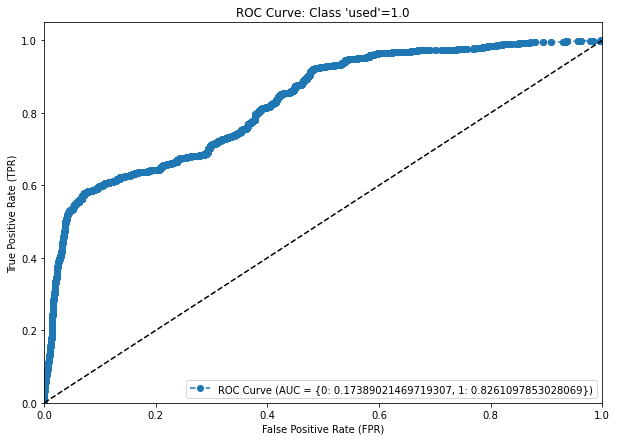

In [34]:
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr,'o--', label=f"ROC Curve (AUC = {roc_auc})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f"ROC Curve: Class \'used\'=1.0")
plt.legend(loc="lower right")
plt.show()